# Instancia de librarias

In [1]:
import pandas as pd
import numpy as np
# import datetime as dt
from datetime import datetime

import scipy.stats as stats
import statistics

import warnings
warnings.filterwarnings('ignore')

# Formato de visualización por centenas
pd.options.display.float_format = '{:,.2f}'.format

# Graficas
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns;sns.set_theme(color_codes=True)

import plotly.graph_objects as go
from plotly.subplots import make_subplots


print("Setup complete")

Setup complete


# Importación de datos

In [2]:
path = r'E:\\skillsForIndustry/project_wallmart/data/Walmart_Store_sales.csv'
wall_data = pd.read_csv(path, header=0, encoding='utf-8')
# Fuete consultada: https://www.kaggle.com/datasets/rutuspatel/walmart-dataset-retail

# Análisis exploratorio

In [3]:
# Se identifica el número de variables y observaciones del dataset
print("Número de observaciones:", wall_data.shape[0])
print("Número de variables:", wall_data.shape[1])
print("Variables",wall_data.keys())

Número de observaciones: 6435
Número de variables: 8
Variables Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')


In [4]:
# Se muestra el tipo de valor de cada variable
# y si existen valores nulos
wall_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [5]:
# Establecer el número de filas de la muestra
muestra = int(wall_data.shape[0]*.60)

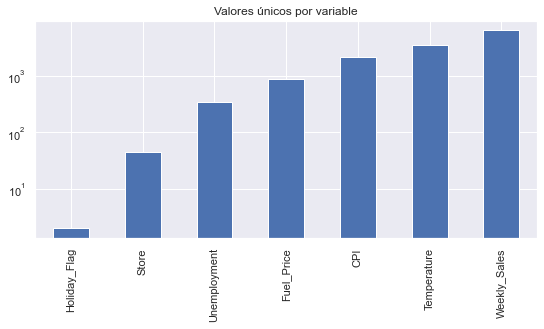

In [6]:
# Se  identifica el número de valores unicos por variable. Solo para las que tienen valores numericos
wall_data.value_counts(wall_data.dtypes)
unq_val = wall_data.select_dtypes(include='number').nunique().sort_values()
unq_val.plot.bar(logy=True, figsize=(9,4),title="Valores únicos por variable");

In [7]:
# Verificando los valores únicos de las fechas que no se tomaron en cuenta en la celda anterior
# La variable Date se esta consideranco como un objeto de strings.
# wall_data.groupby('Date')[['Store']].nunique().sort_values(by = "Store")

# Se obtienen los valores únicos de las fechas (semanas) 
# wall_data['Date'].unique() 

# Se cuentan los valores únicos de las fechas (semanas) 
wall_data['Date'].nunique() #<- 143
# Hay 143 semanas en que se registron las ventas (en día viernes)
#-> 143*45(tiendas) = 6435 observaciones
# Corroboración. Verificamos que la desviación estandar sea cero
# wall_data.Store.value_counts().std() # <- 0

143

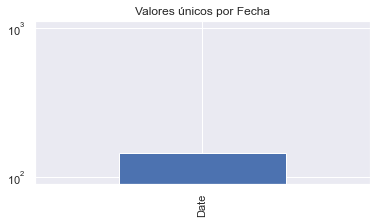

In [8]:
# Se gráfica la cantidad de semanas por tienda
unq_val = wall_data.select_dtypes(include='object').nunique().sort_values()
unq_val.plot.bar(logy=True, figsize=(6,3),title="Valores únicos por Fecha");

In [9]:
# Se verifica el tipo de valores que se  muestran por variable.
wall_data.sample(5,random_state=muestra)

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
5306     38  21-05-2010    340,497.08             0        76.20        3.12   
2441     18  16-04-2010  1,135,577.62             0        50.26        2.88   
5183     37  08-10-2010    524,483.65             0        66.34        2.63   
897       7  05-11-2010    480,512.44             0        49.44        2.73   
3194     23  07-01-2011  1,122,034.48             0        27.81        3.19   

        CPI  Unemployment  
5306 126.18         14.10  
2441 131.98          9.27  
5183 210.51          8.48  
897  191.00          9.14  
3194 132.88          5.11

In [10]:
# Se renombran las columnas y muetsra el encabezado
wall_data.columns = ["tienda","fecha","vta_semana","feriado","temp","precio_gasolina_reg","ipc","tasa_desempleo"]
wall_data.head(3)

tienda       fecha   vta_semana  feriado  temp  precio_gasolina_reg    ipc  \
0       1  05-02-2010 1,643,690.90        0 42.31                 2.57 211.10   
1       1  12-02-2010 1,641,957.44        1 38.51                 2.55 211.24   
2       1  19-02-2010 1,611,968.17        0 39.93                 2.51 211.29   

   tasa_desempleo  
0            8.11  
1            8.11  
2            8.11

In [11]:
# Se cambia el tipo de valor a la variable fecha de str a date
# wall_data['fecha']
# wall_data['fecha_str'] = wall_data['fecha']
wall_data['fecha'] = pd.to_datetime(wall_data['fecha'],format="%d-%m-%Y", dayfirst=True)
wall_data['fecha'] # año - mes - dia


0      2010-02-05
1      2010-02-12
2      2010-02-19
3      2010-02-26
4      2010-03-05
          ...    
6430   2012-09-28
6431   2012-10-05
6432   2012-10-12
6433   2012-10-19
6434   2012-10-26
Name: fecha, Length: 6435, dtype: datetime64[ns]

In [12]:
# Se verifica el tipo de valores que tiene el dataset
pd.value_counts(wall_data.dtypes)

float64           5
int64             2
datetime64[ns]    1
dtype: int64

# Corroboración de valores ausentes

In [13]:
wall_data.isna().sum()

tienda                 0
fecha                  0
vta_semana             0
feriado                0
temp                   0
precio_gasolina_reg    0
ipc                    0
tasa_desempleo         0
dtype: int64

# Verificando periodicidad de fechas

In [14]:
# wall_data[wall_data['fecha']=="2010-02-05"] # Inicio del registro de semana - viernes - febrero 2010
# wall_data[wall_data['fecha'] == "2012-10-26"] # Registro de última semana - viernes - octubre 2012
# wall_data[wall_data['fecha'] >= "2012-11-02"] # No hay registros
wall_data.groupby(['fecha']).size() # 45 (tiendas)*143 semanas = 6435 registros

fecha
2010-02-05    45
2010-02-12    45
2010-02-19    45
2010-02-26    45
2010-03-05    45
              ..
2012-09-28    45
2012-10-05    45
2012-10-12    45
2012-10-19    45
2012-10-26    45
Length: 143, dtype: int64

In [15]:
# Función que separa fechas por periodos de tiempo
def periodo_tiempo (df,f1,f2):
    periodo = df[(df['fecha']>=f1) & (df['fecha']<=f2)].iloc[:,0:4] 
    return periodo

### La tienda con el máximo de ventas registradas es:

In [16]:
# La tienda con el máximo número de ventas registradas en una semana:
# wall_data.groupby('tienda')[['vta_semana']].max().sort_values(by = 'vta_semana', ascending = False)
wall_data.groupby('tienda')[['vta_semana']].max().sort_values(by = 'vta_semana', ascending = False).reset_index().iloc[0,:]
# wall_data.groupby('vta_semana').get_group(3818686.45)
# wall_data[(wall_data['tienda']==14) & (wall_data['vta_semana']==3818686.45)]


tienda              14.00
vta_semana   3,818,686.45
Name: 0, dtype: float64

In [17]:
# La tienda con el máximo número de ventas registradas de"2010-02-05" al "2012-10-26":
wall_data.groupby('tienda')[['vta_semana']].sum().sort_values(by = 'vta_semana', ascending = False).reset_index().iloc[0,:]

tienda                20.00
vta_semana   301,397,792.46
Name: 0, dtype: float64

In [18]:
# Maximo de ventas por semana
max_vta_semana = wall_data.groupby('tienda')[['vta_semana']].max().sort_values(by = 'tienda').reset_index()
# Maximo de ventas en todo el periodo
max_vtas = wall_data.groupby('tienda')[['vta_semana']].sum().sort_values(by = 'tienda').reset_index()

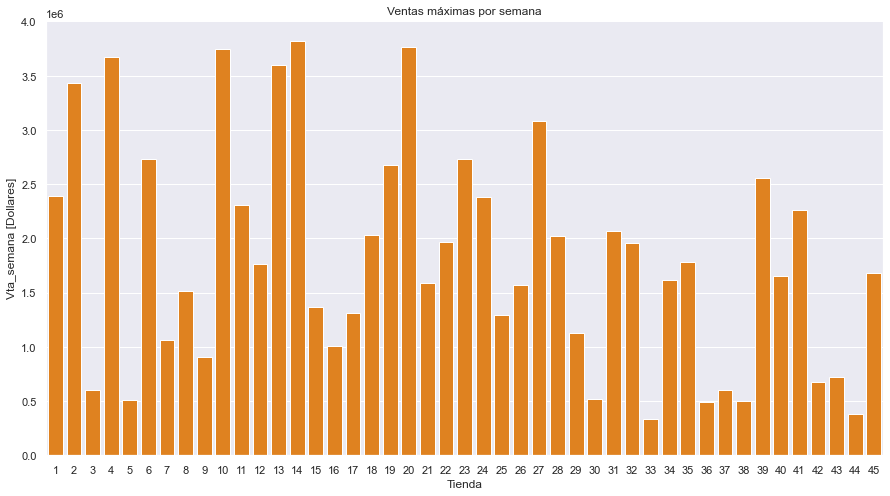

In [19]:
# Se gráfica el monto de venta por semana de cada tienda
plt.figure(figsize=(15,8))
plt.title('Ventas máximas por semana')
sns.barplot(data = max_vta_semana,x = 'tienda',y='vta_semana', color='#FF8300')
plt.xlabel('Tienda')
plt.ylabel('Vta_semana [Dollares]')
plt.show()

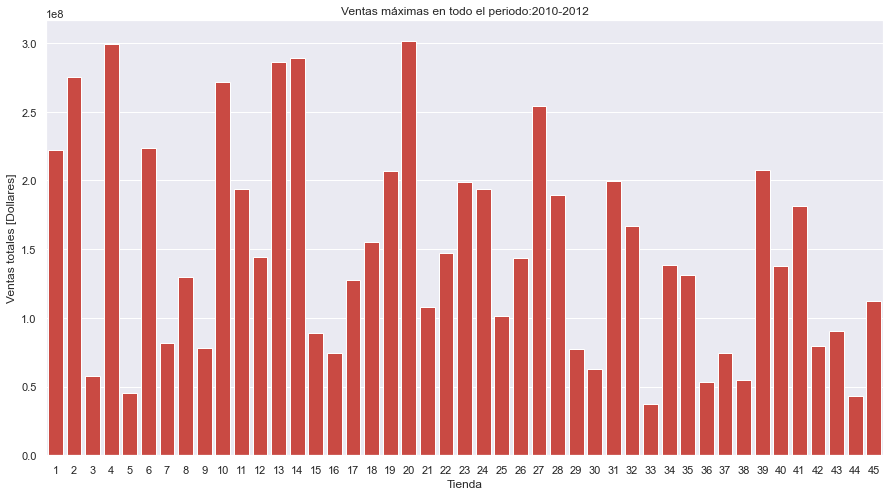

In [20]:
# Se gráfica el monto de venta por todo el periodo por cada tienda:
# "2010-02-05" - 2012-10-26"
plt.figure(figsize=(15,8))
plt.title('Ventas máximas en todo el periodo:2010-2012')
sns.barplot(data = max_vtas,x = 'tienda',y='vta_semana', color= '#DF362D')
plt.xlabel('Tienda')
plt.ylabel('Ventas totales [Dollares]')
plt.show()

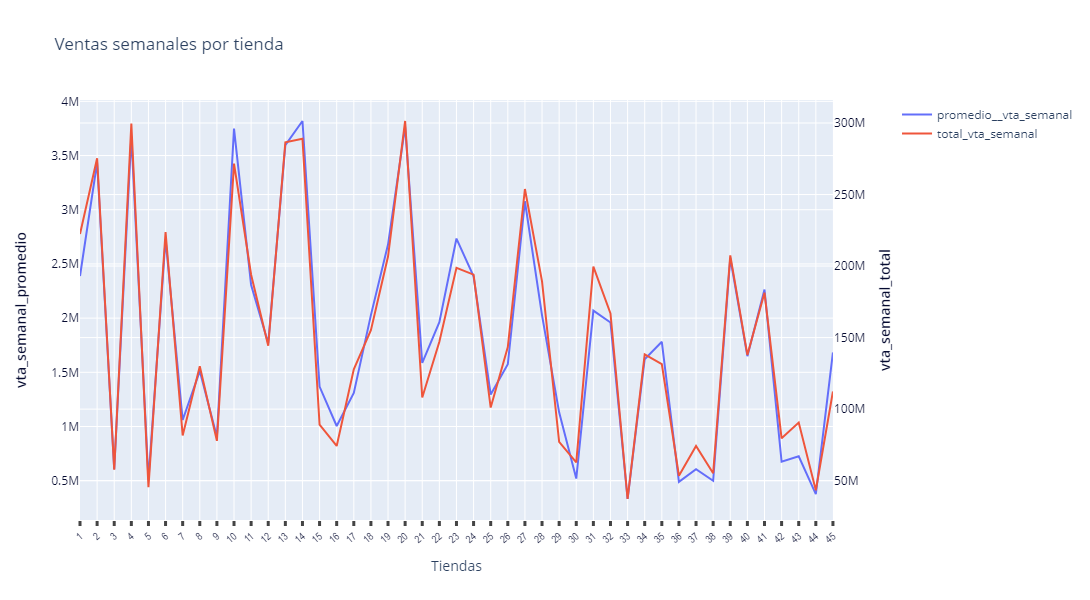

In [21]:
fig = make_subplots(specs=[[{"secondary_y": True}]])

x_max_vta_sem = max_vta_semana.tienda
y_max_vta_sem  = max_vta_semana.vta_semana
x_max_vta_total = max_vtas.tienda
y_max_vta_total = max_vtas.vta_semana

fig.add_trace(
    go.Scatter(x = x_max_vta_sem,y = y_max_vta_sem, name="promedio__vta_semanal"),
    secondary_y=False
)

fig.add_trace(
    go.Scatter(x = x_max_vta_total ,y = y_max_vta_total, name="total_vta_semanal"),
    secondary_y=True
)

fig.update_layout(
    title_text="Ventas semanales por tienda",
    width = 1000, height = 600
)

fig.update_xaxes(title_text="Tiendas", range = [1,45], ticks='outside',ticklen=5, tickwidth=3,nticks=45, tickangle=320,
                 tickfont=dict(family='Arial Narrow',size=10.5,color='#050A30'))

fig.update_yaxes(title_text="<b>vta_semanal_promedio</b>", secondary_y=False,color='#050A30')
fig.update_yaxes(title_text="<b>vta_semanal_total</b>", secondary_y=True,color='#050A30')

fig.show()

### La tienda con la desviación estadar máxima fue:

<AxesSubplot:>

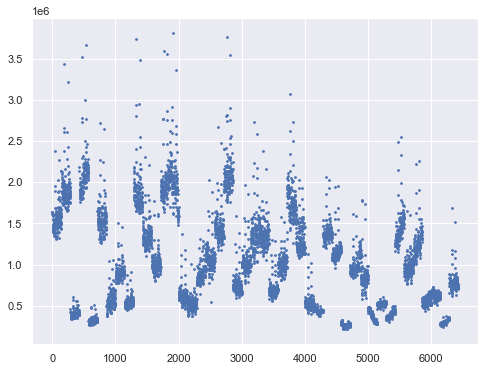

In [22]:
# La distribución de los datos del dataset es:
# wall_data.plot(lw=0, marker=".",subplots=True,layout=(-1,4),figsize=(15,30),markersize=2.5)

# La disribucion de los datos referente a las ventas por semana de todas las observaciones es:
# wall_data.iloc[:,[2]].plot(lw=0, marker=".",figsize=(8,6),markersize=3.5)
wall_data.vta_semana.plot(lw=0, marker=".",figsize=(8,6),markersize=3.5)

In [23]:
# Se obtiene la desviación estandar de las ventas por semana vta_semana
std_des = wall_data.groupby('tienda')['vta_semana'].aggregate(['std','mean']).reset_index().sort_values(by = 'std', ascending=False)
std_des["cv"] = (std_des['std']/std_des['mean']) * 100
top_5_std_des = std_des.head(5)

In [24]:
top_5_std_des

tienda        std         mean    cv
13      14 317,569.95 2,020,978.40 15.71
9       10 302,262.06 1,899,424.57 15.91
19      20 275,900.56 2,107,676.87 13.09
3        4 266,201.44 2,094,712.96 12.71
12      13 265,507.00 2,003,620.31 13.25

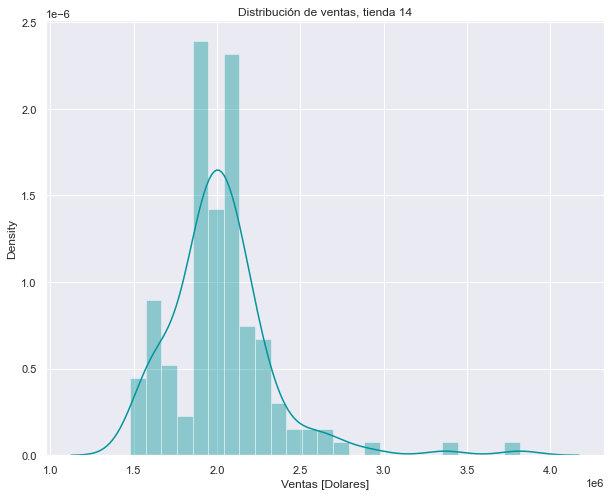

In [25]:
# wall_data[wall_data['tienda']==14].iloc[:,[2]]
plt.figure(figsize=(10,8))
sns.distplot(wall_data[wall_data['tienda']==14].iloc[:,[2]],color='#01949A', kde=True)
plt.title('Distribución de ventas, tienda 14')
plt.xlabel('Ventas [Dolares]')
plt.show()

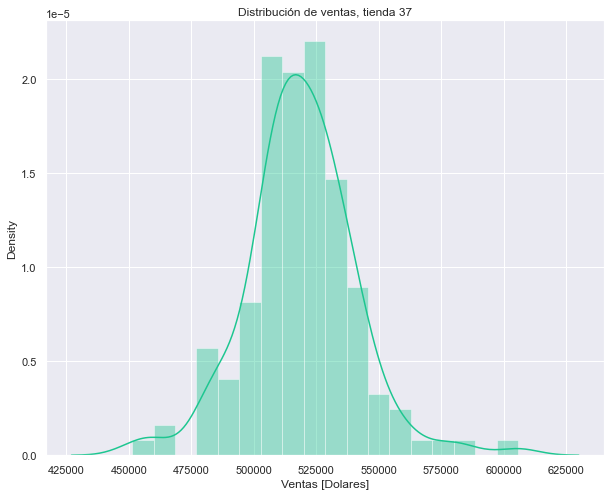

In [26]:
# std_des.sort_values(by='cv', ascending=False)
# std_des.sort_values(by='cv') #<-37
plt.figure(figsize=(10,8))
sns.distplot(wall_data[wall_data['tienda']==37].iloc[:,[2]],color='#1DC690', kde=True)
plt.title('Distribución de ventas, tienda 37')
plt.xlabel('Ventas [Dolares]')
plt.show()

### Ventas por semanas de la tienda 1

In [27]:
# Son 143 semanas
# El registro de datos se compone por todos los ingresos de ventas en día viernes de 2010 al 2012
# por cada tienda de forma ascendente
# Para la tienda 1 febrero 2010 a octubre de 2012
# Por ejemplo:
# wall_data.iloc[0:143,:] # Corresponden a la tienda UNO

# Para la tienda 1 febrero 2010 a octubre de 2012
# wall_data.iloc[0:143,:]
# plt.figure(figsize=(16,10))
# plt.plot(wall_data.iloc[0:143,[2]],color='#F52EC0')
# plt.xlim(0,143)
# plt.xticks(range(0,143,5))
# plt.title("Tienda 1 Semanas:2010 - 2012")
# plt.xlabel("Semanas")
# plt.ylabel("Dolares")
# plt.show()

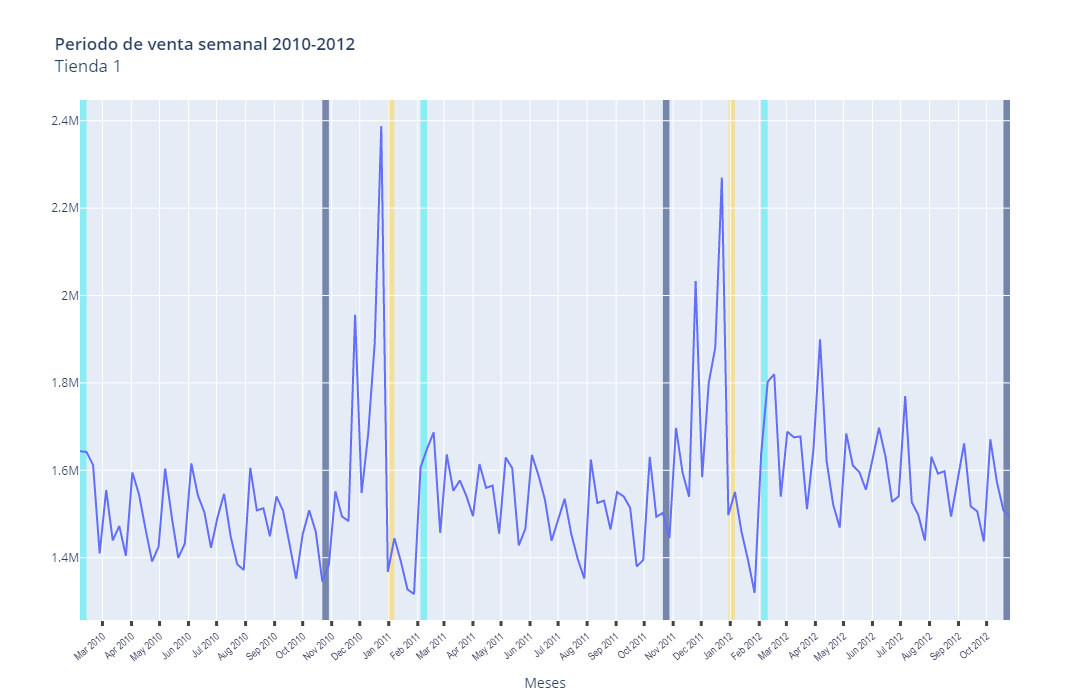

In [28]:
x_store_1 = wall_data.fecha.iloc[0:143]
y_store_1 = wall_data.vta_semana.iloc[0:143]

fig = go.Figure(layout=go.Layout(
        title="<b>Periodo de venta semanal 2010-2012</b><br>Tienda 1</br>",
        width=1200,
        height=700,
    ))

fig.add_trace(go.Scatter(
    x = x_store_1,
    y = y_store_1,
    mode='lines'
))

# Fin e Inicio de semana 2010-2011 (color amarillo)
# Periodo completo de meses y semanas
fig.add_vrect(
    x0='2010-12-31',x1='2011-01-07',
    fillcolor='#FFD53D',opacity=0.5,
    layer='below', line_width=0,
),
fig.add_vrect(
    x0='2011-12-30', x1='2012-01-06',
    fillcolor='#FFD53D',opacity=0.5,
    layer='below', line_width=0,
),

# Inicio de semana a partir de febrero
# 2010-2011-2012(color cyan)
fig.add_vrect(
    x0='2010-02-05', x1='2010-02-12',
    fillcolor='#2CEEF0',opacity=0.5,
    layer='below', line_width=0,
),
fig.add_vrect(
    x0='2011-02-04', x1='2011-02-11',
    fillcolor='#2CEEF0',opacity=0.5,
    layer='below', line_width=0,
),
fig.add_vrect(
    x0='2012-02-03', x1='2012-02-10',
    fillcolor='#2CEEF0',opacity=0.5,
    layer='below', line_width=0,
),

# Fin de semana a partir de octubre
# 2010-2011-2012(color gris)
fig.add_vrect(
    x0='2010-10-22', x1='2010-10-29',
    fillcolor='#041F60',opacity=0.5,
    layer='below', line_width=0,
),
fig.add_vrect(
    x0='2011-10-21', x1='2011-10-28',
    fillcolor='#041F60',opacity=0.5,
    layer='below', line_width=0,
),
fig.add_vrect(
    x0='2012-10-19', x1='2012-10-26',
    fillcolor='#041F60',opacity=0.5,
    layer='below', line_width=0,
),

fig.update_xaxes(title_text="Meses", ticks='outside',ticklen=5, tickwidth=3,
                 nticks=45, tickangle=320,tickfont=dict(family='Arial Narrow',size=10.5,
                                                        color='#050A30')
)

fig.show()

### Ventas por cada año

#### 2010

In [29]:
# data = wall_data.iloc[0:6435,[2]]
vta_2010 = periodo_tiempo(wall_data,"2010-02-05","2010-12-31")
# vta_2010 = vta_2010.groupby(['fecha'])[['vta_semana']].sum().reset_index()
vta_2010['año']= pd.DatetimeIndex(vta_2010['fecha']).year
vta_2010['mes']=pd.DatetimeIndex(vta_2010['fecha']).month
vta_2010['semana']=pd.DatetimeIndex(vta_2010['fecha']).week

# vta_2010['mes'].strftime('%B') 
# ->AttributeError: 'Series' object has no attribute 'datetime'

mes_str = {1:'enero',2:'febrero',3:'marzo',4:'abril',5:'mayo',6:'junio',\
           7:'julio',8:'agosto',9:'septiembre',10:'octubre',11:'noviembre',12:'diciembre'}
vta_2010['mes'] = vta_2010['mes'].apply(lambda x: mes_str[x])
# vta_2010
vta_2010.groupby('mes').ngroups # para todo el periodo sería por año
# vta_2010.groupby(['mes','tienda'])['vta_semana'].aggregate([sum,'mean']).iloc[0:46,:]
vta_2010_mesual = vta_2010.groupby(['mes'])['vta_semana'].aggregate([sum,'mean']).sort_values(by='sum',ascending=False).reset_index()
vta_2010_mesual

mes            sum         mean
0    diciembre 288,760,532.72 1,283,380.15
1        julio 232,580,125.98 1,033,689.45
2        abril 231,412,368.05 1,028,499.41
3      octubre 217,161,824.02   965,163.66
4    noviembre 202,853,370.14 1,126,963.17
5        junio 192,246,172.36 1,068,034.29
6      febrero 190,332,983.04 1,057,405.46
7       agosto 187,640,110.89 1,042,445.06
8         mayo 186,710,934.34 1,037,282.97
9        marzo 181,919,802.50 1,010,665.57
10  septiembre 177,267,896.37   984,821.65

#### 2011

In [30]:
# Por año. 2011
# data = wall_data.iloc[0:6435,[2]]
vta_2011 = periodo_tiempo(wall_data,"2011-01-07","2011-12-30")
# vta_2011 = vta_2011.groupby(['fecha'])[['vta_semana']].sum().reset_index()
vta_2011['año']= pd.DatetimeIndex(vta_2011['fecha']).year
vta_2011['mes']=pd.DatetimeIndex(vta_2011['fecha']).month
vta_2011['semana']=pd.DatetimeIndex(vta_2011['fecha']).week
# vta_2011['mes'].strftime('%B') 
# ->AttributeError: 'Series' object has no attribute 'datetime'
mes_str = {1:'enero',2:'febrero',3:'marzo',4:'abril',5:'mayo',6:'junio',\
           7:'julio',8:'agosto',9:'septiembre',10:'octubre',11:'noviembre',12:'diciembre'}
vta_2011['mes'] = vta_2011['mes'].apply(lambda x: mes_str[x])
# vta_2011
vta_2011.groupby('mes').ngroups # para todo el periodo sería por año
# vta_2011.groupby(['mes','tienda'])['vta_semana'].aggregate([sum,'mean']).iloc[0:46,:]
vta_2011_mesual = vta_2011.groupby(['mes'])['vta_semana'].aggregate([sum,'mean']).sort_values(by='sum',ascending=False).reset_index()
vta_2011_mesual

mes            sum         mean
0    diciembre 288,078,102.48 1,280,347.12
1        julio 229,911,398.87 1,021,828.44
2        abril 226,526,510.97 1,006,784.49
3   septiembre 220,847,738.42   981,545.50
4    noviembre 210,162,354.87 1,167,568.64
5        junio 189,773,385.19 1,054,296.58
6       agosto 188,599,332.25 1,047,774.07
7      febrero 186,331,327.87 1,035,174.04
8      octubre 183,261,283.15 1,018,118.24
9         mayo 181,648,158.16 1,009,156.43
10       marzo 179,356,448.29   996,424.71
11       enero 163,703,966.83   909,466.48

#### 2012

In [31]:
# Por año. 2012
# data = wall_data.iloc[0:6435,[2]]
vta_2012 = periodo_tiempo(wall_data,"2012-01-06","2012-10-26")
# vta_2012 = vta_2012.groupby(['fecha'])[['vta_semana']].sum().reset_index()
vta_2012['año']= pd.DatetimeIndex(vta_2012['fecha']).year
vta_2012['mes']=pd.DatetimeIndex(vta_2012['fecha']).month
vta_2012['semana']=pd.DatetimeIndex(vta_2012['fecha']).week
# vta_2012['mes'].strftime('%B') 
# ->AttributeError: 'Series' object has no attribute 'datetime'
mes_str = {1:'enero',2:'febrero',3:'marzo',4:'abril',5:'mayo',6:'junio',\
           7:'julio',8:'agosto',9:'septiembre',10:'octubre',11:'noviembre',12:'diciembre'}
vta_2012['mes'] = vta_2012['mes'].apply(lambda x: mes_str[x])
# vta_2012
vta_2012.groupby('mes').ngroups # para todo el periodo sería por año
# vta_2012.groupby(['mes','tienda'])['vta_semana'].aggregate([sum,'mean']).iloc[0:46,:]
vta_2012_mesual = vta_2012.groupby(['mes'])['vta_semana'].aggregate([sum,'mean']).sort_values(by='sum',ascending=False).reset_index()
vta_2012_mesual

mes            sum         mean
0       junio 240,610,329.29 1,069,379.24
1      agosto 236,850,765.68 1,052,670.07
2       marzo 231,509,650.49 1,028,931.78
3     febrero 192,063,579.54 1,067,019.89
4       abril 188,920,905.95 1,049,560.59
5        mayo 188,766,479.45 1,048,702.66
6       julio 187,509,452.40 1,041,719.18
7     octubre 184,361,680.42 1,024,231.56
8  septiembre 180,645,544.47 1,003,586.36
9       enero 168,894,471.66   938,302.62

#### Gráficas de las ventas por cada año

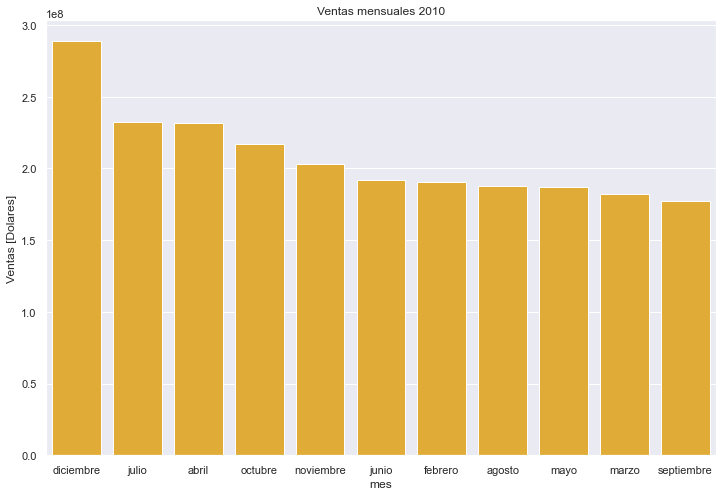

In [32]:
# Grafica de ventas mensuales del 2010
x_mensual = vta_2010_mesual.iloc[:,0]
y_mensual = vta_2010_mesual.iloc[:,1]
plt.figure(figsize=(12,8))
plt.title('Ventas mensuales 2010')
sns.barplot(x=x_mensual,y=y_mensual, color = '#FCB61A')
plt.xlabel('mes')
plt.ylabel('Ventas [Dolares]')
plt.show()

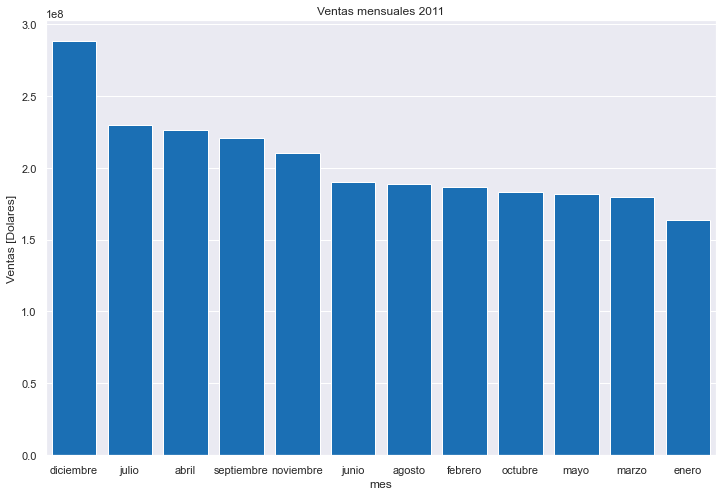

In [33]:
# Grafica de ventas mensuales del 2011
x_mensual = vta_2011_mesual.iloc[:,0]
y_mensual = vta_2011_mesual.iloc[:,1]
plt.figure(figsize=(12,8))
plt.title('Ventas mensuales 2011')
sns.barplot(x=x_mensual, y=y_mensual, color = '#0171CE')
plt.xlabel('mes')
plt.ylabel('Ventas [Dolares]')
plt.show()

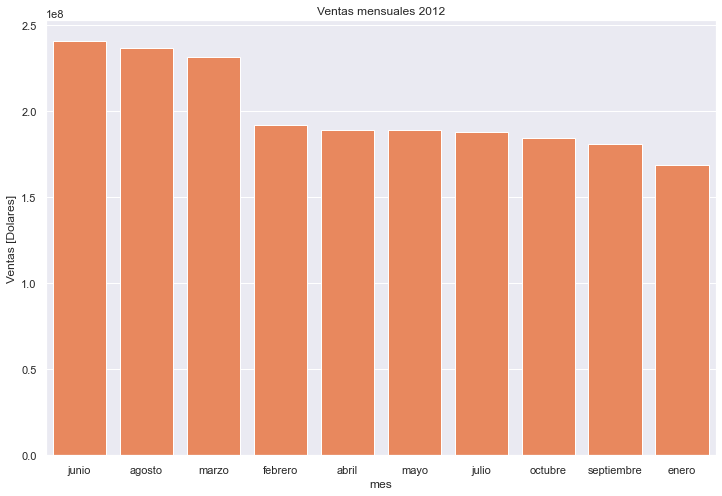

In [34]:
# Grafica de ventas mensuales del 2012
x_mensual = vta_2012_mesual.iloc[:,0]
y_mensual = vta_2012_mesual.iloc[:,1]
plt.figure(figsize=(12,8))
plt.title('Ventas mensuales 2012')
sns.barplot(x=x_mensual, y=y_mensual,color = '#FF7F47')
plt.xlabel('mes')
plt.ylabel('Ventas [Dolares]')
plt.show()

### Ventas de todo el periodo 2010-2012

In [35]:
# Se crea un nuevo dataset (wall_data_2) que contega los agrupamientos de vta_2010
# vta_2011,vta_2012
wall_data_2 = pd.concat([vta_2010,vta_2011,vta_2012])
wall_data_2['año'] = pd.DatetimeIndex(wall_data_2['fecha']).year
wall_data_2['mes'] = pd.DatetimeIndex(wall_data_2['fecha']).month
wall_data_2['semana'] = pd.DatetimeIndex(wall_data_2['fecha']).week
wall_data_2['mes'] = wall_data_2['mes'].apply(lambda x: mes_str[x])

# En las siguientes líneas se puede contar el número de grupos por año, agrupar por año el dataset
# y despues obtener el grupo de cada año y guardarlo en cada variable
# wall_data_2.groupby('año').ngroups #->3
# vta_2010_2= wall_data_2.groupby('año').get_group(2010)

vta_2010_2=wall_data_2[wall_data_2['año']==2010]
vta_2011_2=wall_data_2[wall_data_2['año']==2011]
vta_2012_2=wall_data_2[wall_data_2['año']==2012]


#### Ventas anuales 2010-201: <br>Agrupación por semana</br>

In [36]:
vta_2010_semana = vta_2010_2.groupby('semana')[['vta_semana']].sum().reset_index()
vta_2011_semana = vta_2011_2.groupby('semana')[['vta_semana']].sum().reset_index()
vta_2012_semana = vta_2012_2.groupby('semana')[['vta_semana']].sum().reset_index()


#### Ventas por semana de <br>2010 vs 2011</br>

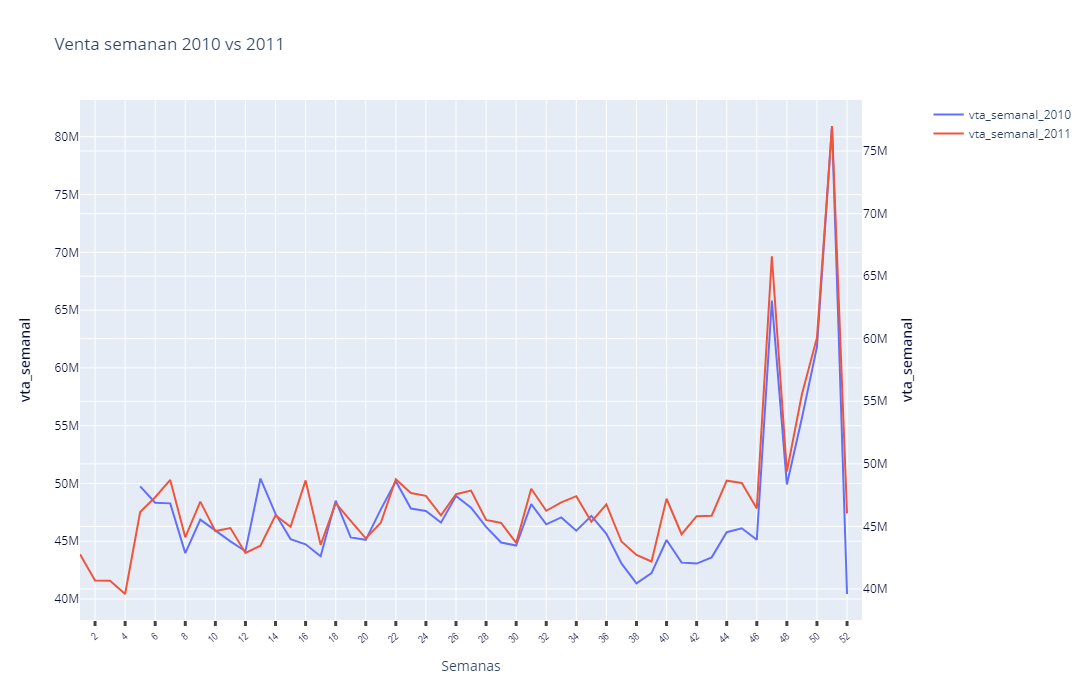

In [37]:
x_sem_2010 = vta_2010_semana.semana
y_sem_2010 = vta_2010_semana.vta_semana
x_sem_2011 = vta_2011_semana.semana
y_sem_2011 = vta_2011_semana.vta_semana

fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Scatter(x = x_sem_2010,y = y_sem_2010, name="vta_semanal_2010"),
    secondary_y=False
)

fig.add_trace(
    go.Scatter(x = x_sem_2011,y = y_sem_2011, name="vta_semanal_2011"),
    secondary_y=True
)

fig.update_layout(
    title_text="Venta semanan 2010 vs 2011",
    width = 1200, height = 700
)


fig.update_xaxes(title_text="Semanas", range = [1,53], ticks='outside',ticklen=5, tickwidth=3,nticks=45, tickangle=320,
                 tickfont=dict(family='Arial Narrow',size=10.5,color='#050A30'))

fig.update_yaxes(title_text="<b>vta_semanal</b>", secondary_y=False,color='#050A30')
fig.update_yaxes(title_text="<b>vta_semanal</b>", secondary_y=True,color='#050A30')

fig.show()

#### Ventas por semana de <br>2012 vs 2011</br>

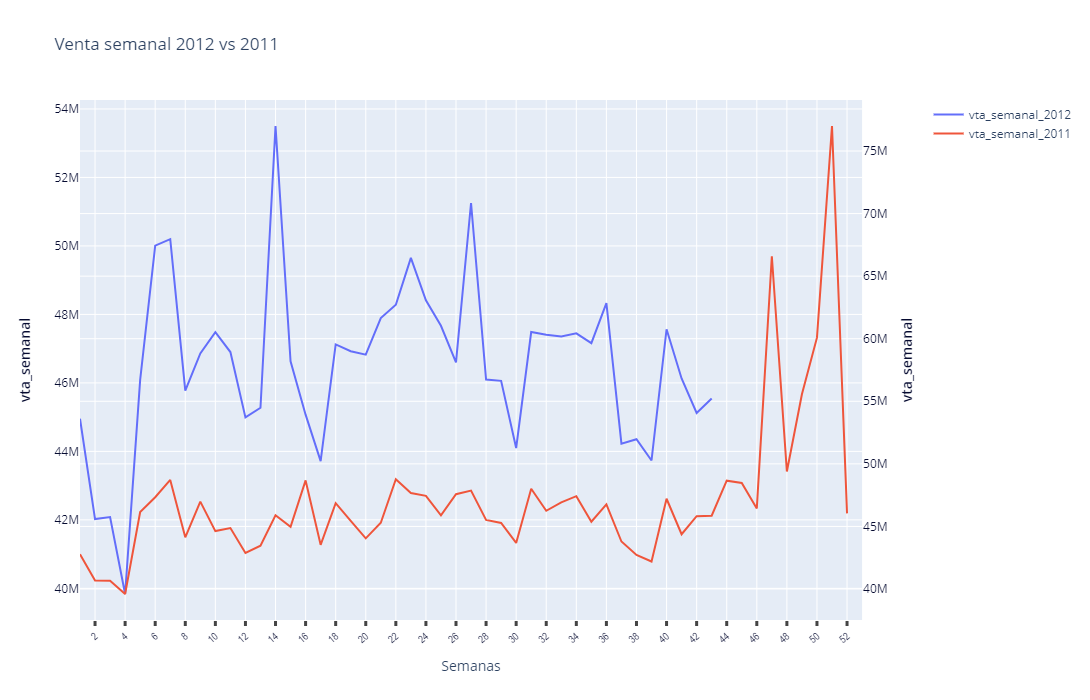

In [38]:
x_sem_2012 = vta_2012_semana.semana
y_sem_2012 = vta_2012_semana.vta_semana
x_sem_2011 = vta_2011_semana.semana
y_sem_2011 = vta_2011_semana.vta_semana

fig = make_subplots(specs=[[{'secondary_y':True}]])
fig.add_trace(
    go.Scatter(x = x_sem_2012, y =y_sem_2012, name='vta_semanal_2012'),
    secondary_y=False
)
fig.add_trace(
    go.Scatter(x=x_sem_2011,y=y_sem_2011,name='vta_semanal_2011'),
    secondary_y=True
)
fig.update_layout(
    title_text='Venta semanal 2012 vs 2011',
    width= 1200, height=700
)
fig.update_xaxes(
    title_text="Semanas", range = [1,53], ticks='outside',ticklen=5, tickwidth=3,nticks=45, tickangle=320,
                 tickfont=dict(family='Arial Narrow',size=10.5,color='#050A30')
)
fig.update_yaxes(
    title_text="<b>vta_semanal</b>", secondary_y=False,color='#050A30'
)
fig.update_yaxes(
    title_text="<b>vta_semanal</b>", secondary_y=True,color='#050A30'
)

#### Ventas por semana de <br>2010, 2011, 2012</br>

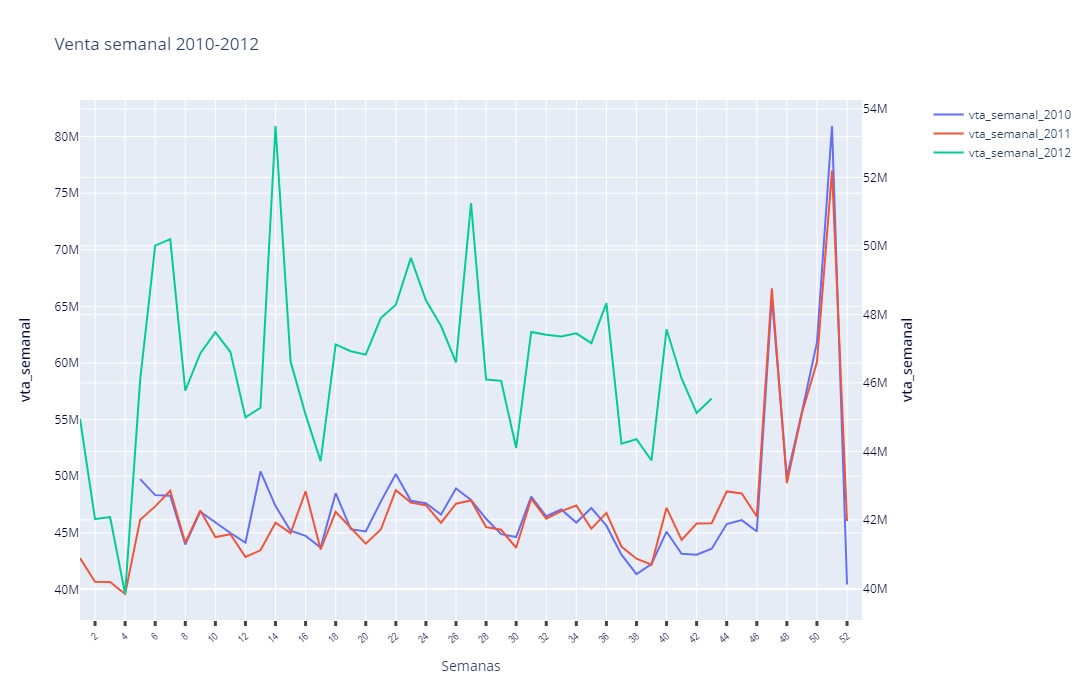

In [39]:
x_sem_2010 = vta_2010_semana.semana
y_sem_2010 = vta_2010_semana.vta_semana
x_sem_2011 = vta_2011_semana.semana
y_sem_2011 = vta_2011_semana.vta_semana
x_sem_2012 = vta_2012_semana.semana
y_sem_2012 = vta_2012_semana.vta_semana

fig = make_subplots(specs=[[{'secondary_y':True}]])
fig.add_trace(
    go.Scatter(x = x_sem_2010, y = y_sem_2010, name='vta_semanal_2010'),
    secondary_y=False
)
fig.add_trace(
    go.Scatter(x = x_sem_2011, y = y_sem_2011,name='vta_semanal_2011'),
    secondary_y=False
)
fig.add_trace(
    go.Scatter(x = x_sem_2012, y = y_sem_2012,name='vta_semanal_2012'),
    secondary_y=True
)
fig.update_layout(
    title_text='Venta semanal 2010-2012',
    width= 1200, height=700
)
fig.update_xaxes(
    title_text="Semanas", range = [1,53], ticks='outside',ticklen=5, tickwidth=3,nticks=45, tickangle=320,
                 tickfont=dict(family='Arial Narrow',size=10.5,color='#050A30')
)
fig.update_yaxes(
    title_text="<b>vta_semanal</b>", secondary_y=False,color='#050A30'
)
fig.update_yaxes(
    title_text="<b>vta_semanal</b>", secondary_y=False,color='#050A30'
)
fig.update_yaxes(
    title_text="<b>vta_semanal</b>", secondary_y=True,color='#050A30'
)

### Trimestres / Quartiles de año

In [40]:
# Se crea una columna pivote (trimestre) para categorizar cad trimestre segun el mes
vta_2012_2['trimestre']='t'

# vta_2012_2['trimestre'] = vta_2012_2['trimestre'][(vta_2012_2['mes'] == 'enero') | (vta_2012_2['mes']=='febrero')|(vta_2012_2['mes']=='marzo')].str.replace('t','t1')
# El método replace() sustituye los t pt t1 en las coinsidecias pero las demas los demas renglones se llenan con NaN
# vta_2012_2['trimestre'] = vta_2012_2['trimestre'][(vta_2012_2['mes'] == 'abril') | (vta_2012_2['mes']=='mayo')|(vta_2012_2['mes']=='junio')].str.replace('t','t2')
# El metodo replace sólo funciona en series o en los dataframe sustituyendo todo los NaN, por eso sustituyo directamente en la columna trimestre el valor
# que necesito con base a la igualdad de la columna mes que cumpla con los meses.

vta_2012_2['trimestre'][(vta_2012_2['mes'] == 'enero') | (vta_2012_2['mes']=='febrero')|(vta_2012_2['mes']=='marzo')] = 't1'
vta_2012_2['trimestre'][(vta_2012_2['mes'] == 'abril') | (vta_2012_2['mes']=='mayo')|(vta_2012_2['mes']=='junio')] = 't2'
vta_2012_2['trimestre'][(vta_2012_2['mes'] == 'julio') | (vta_2012_2['mes']=='agosto')|(vta_2012_2['mes']=='septiembre')] = 't3'
vta_2012_2['trimestre'][(vta_2012_2['mes'] == 'octubre') | (vta_2012_2['mes']=='noviembre')|(vta_2012_2['mes']=='diciembre')] = 't4'

vta_2012_2
# ------------------------------------------------------------------------------ #
# El siguiete ciclo ilustra como funcionan la siguiente línea de código pero es mucho menos efectivo
# vta_2012_2['trimestre'][(vta_2012_2['mes'] == 'enero') | (vta_2012_2['mes']=='febrero')|(vta_2012_2['mes']=='marzo')] = 't1'
# for i in vta_2012_2['mes']:
#     if i in ['enero','febrero','marzo']:
#         vta_2012_2['trimestre'][vta_2012_2[vta_2012_2['mes']==i].index]='t1'
#     elif i in ['abril','mayo','junio']:
#         vta_2012_2['trimestre'][vta_2012_2[vta_2012_2['mes']==i].index]='t2'
#     elif i in ['julio','agosto','septiembre']:
#         vta_2012_2['trimestre'][vta_2012_2[vta_2012_2['mes']==i].index]='t3'
#     elif i in ['octubre','noviembre','diciembre']:
#         vta_2012_2['trimestre'][vta_2012_2[vta_2012_2['mes']==i].index]='t4'
# vta_2012_2['mes']
# vta_2012_2[vta_2012_2['mes']==i].index
# vta_2012_2['mes'][vta_2012_2[vta_2012_2['mes']==i].index]
# ------------------------------------------------------------------------------ #

tienda      fecha   vta_semana  feriado   año         mes  semana  \
100        1 2012-01-06 1,550,369.92        0  2012       enero       1   
101        1 2012-01-13 1,459,601.17        0  2012       enero       2   
102        1 2012-01-20 1,394,393.84        0  2012       enero       3   
103        1 2012-01-27 1,319,325.59        0  2012       enero       4   
104        1 2012-02-03 1,636,339.65        0  2012     febrero       5   
...      ...        ...          ...      ...   ...         ...     ...   
6430      45 2012-09-28   713,173.95        0  2012  septiembre      39   
6431      45 2012-10-05   733,455.07        0  2012     octubre      40   
6432      45 2012-10-12   734,464.36        0  2012     octubre      41   
6433      45 2012-10-19   718,125.53        0  2012     octubre      42   
6434      45 2012-10-26   760,281.43        0  2012     octubre      43   

     trimestre  
100         t1  
101         t1  
102         t1  
103         t1  
104         t1  
...        ...  
6430        t3  
6431        t4  
6432        t4  
6433        t4  
6434        t4  

[1935 rows x 8 columns]

In [41]:
# Se utilia el criterio de la celda anterior pero ya no es necesario usr el replace
vta_2011_2['trimestre']= None
vta_2011_2['trimestre'][(vta_2011_2['mes'] == 'enero') | (vta_2011_2['mes']=='febrero')|(vta_2011_2['mes']=='marzo')] = 't1'
vta_2011_2['trimestre'][(vta_2011_2['mes'] == 'abril') | (vta_2011_2['mes']=='mayo')|(vta_2011_2['mes']=='junio')] = 't2'
vta_2011_2['trimestre'][(vta_2011_2['mes'] == 'julio') | (vta_2011_2['mes']=='agosto')|(vta_2011_2['mes']=='septiembre')] = 't3'
vta_2011_2['trimestre'][(vta_2011_2['mes'] == 'octubre') | (vta_2011_2['mes']=='noviembre')|(vta_2011_2['mes']=='diciembre')] = 't4'

vta_2011_2

tienda      fecha   vta_semana  feriado   año        mes  semana  \
48         1 2011-01-07 1,444,732.28        0  2011      enero       1   
49         1 2011-01-14 1,391,013.96        0  2011      enero       2   
50         1 2011-01-21 1,327,405.42        0  2011      enero       3   
51         1 2011-01-28 1,316,899.31        0  2011      enero       4   
52         1 2011-02-04 1,606,629.58        0  2011    febrero       5   
...      ...        ...          ...      ...   ...        ...     ...   
6387      45 2011-12-02   875,699.81        0  2011  diciembre      48   
6388      45 2011-12-09   957,155.31        0  2011  diciembre      49   
6389      45 2011-12-16 1,078,905.68        0  2011  diciembre      50   
6390      45 2011-12-23 1,521,957.99        0  2011  diciembre      51   
6391      45 2011-12-30   869,403.63        1  2011  diciembre      52   

     trimestre  
48          t1  
49          t1  
50          t1  
51          t1  
52          t1  
...        ...  
6387        t4  
6388        t4  
6389        t4  
6390        t4  
6391        t4  

[2340 rows x 8 columns]

In [42]:
vta_2010_2['trimestre']=None
vta_2010_2['trimestre'][(vta_2010_2['mes'] == 'enero') | (vta_2010_2['mes']=='febrero')|(vta_2010_2['mes']=='marzo')] = 't1'
vta_2010_2['trimestre'][(vta_2010_2['mes'] == 'abril') | (vta_2010_2['mes']=='mayo')|(vta_2010_2['mes']=='junio')] = 't2'
vta_2010_2['trimestre'][(vta_2010_2['mes'] == 'julio') | (vta_2010_2['mes']=='agosto')|(vta_2010_2['mes']=='septiembre')] = 't3'
vta_2010_2['trimestre'][(vta_2010_2['mes'] == 'octubre') | (vta_2010_2['mes']=='noviembre')|(vta_2010_2['mes']=='diciembre')] = 't4'

vta_2010_2

tienda      fecha   vta_semana  feriado   año        mes  semana  \
0          1 2010-02-05 1,643,690.90        0  2010    febrero       5   
1          1 2010-02-12 1,641,957.44        1  2010    febrero       6   
2          1 2010-02-19 1,611,968.17        0  2010    febrero       7   
3          1 2010-02-26 1,409,727.59        0  2010    febrero       8   
4          1 2010-03-05 1,554,806.68        0  2010      marzo       9   
...      ...        ...          ...      ...   ...        ...     ...   
6335      45 2010-12-03   879,244.90        0  2010  diciembre      48   
6336      45 2010-12-10 1,002,364.34        0  2010  diciembre      49   
6337      45 2010-12-17 1,123,282.85        0  2010  diciembre      50   
6338      45 2010-12-24 1,682,862.03        0  2010  diciembre      51   
6339      45 2010-12-31   679,156.20        1  2010  diciembre      52   

     trimestre  
0           t1  
1           t1  
2           t1  
3           t1  
4           t1  
...        ...  
6335        t4  
6336        t4  
6337        t4  
6338        t4  
6339        t4  

[2160 rows x 8 columns]

### Ventas por trimestres

#### 2010

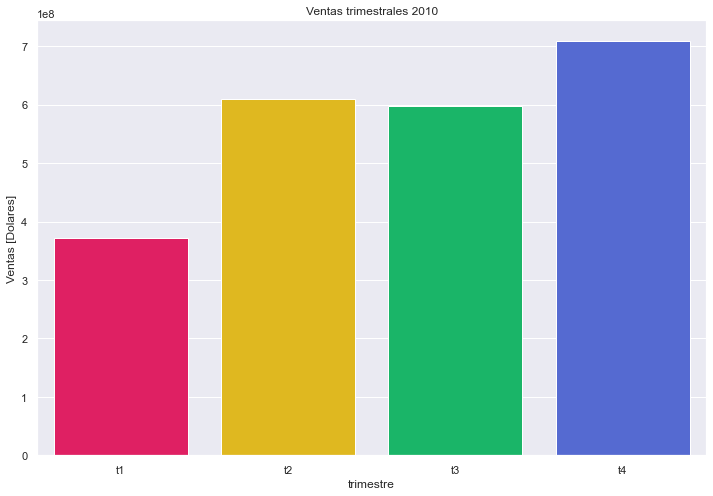

In [43]:
vta_2010_trim = vta_2010_2.groupby('trimestre')[['vta_semana']].sum().reset_index()

plt.figure(figsize=(12,8))
plt.title('Ventas trimestrales 2010')
sns.barplot(x='trimestre',y='vta_semana',data=vta_2010_trim, palette = ['#FF0059', '#FFCB00', '#00CF68', '#405DE6'])
plt.xlabel('trimestre')
plt.ylabel('Ventas [Dolares]')
plt.show()

#### 2011

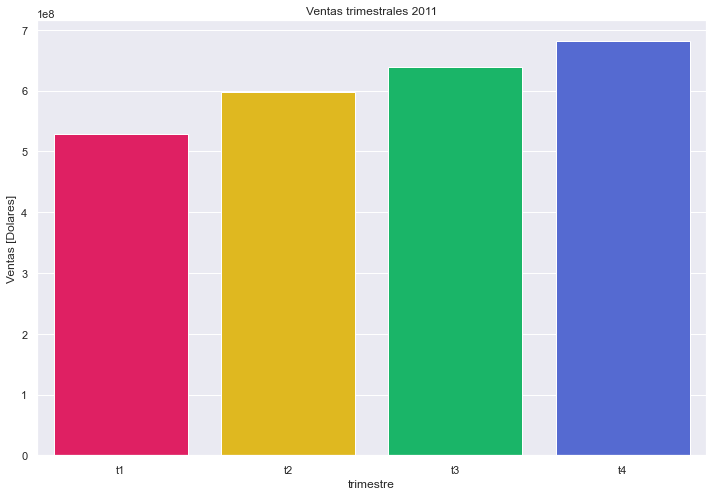

In [44]:
vta_2011_tri=vta_2011_2.groupby('trimestre')[['vta_semana']].sum().reset_index()
plt.figure(figsize=(12,8))
plt.title('Ventas trimestrales 2011')
sns.barplot(x='trimestre',y='vta_semana',data=vta_2011_tri,palette = ['#FF0059', '#FFCB00', '#00CF68', '#405DE6'])
plt.xlabel('trimestre')
plt.ylabel('Ventas [Dolares]')
plt.show()

#### 2012

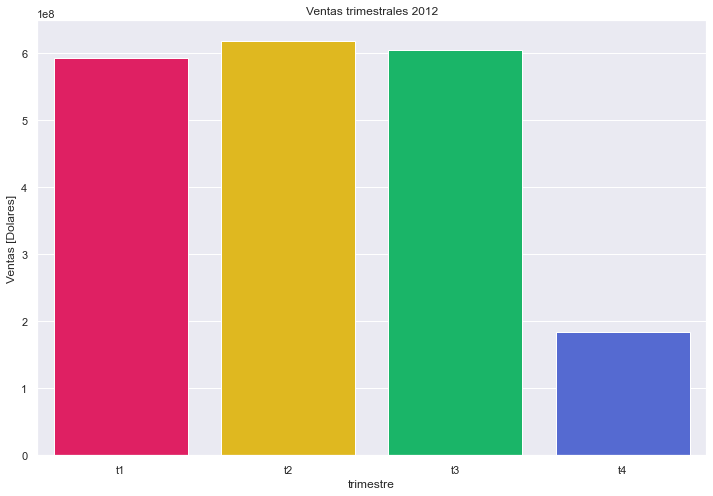

In [45]:
vta_2012_tri=vta_2012_2.groupby('trimestre')[['vta_semana']].sum().reset_index()
plt.figure(figsize=(12,8))
plt.title('Ventas trimestrales 2012')
sns.barplot(x='trimestre',y='vta_semana',data=vta_2012_tri, palette = ['#FF0059', '#FFCB00', '#00CF68', '#405DE6'])
plt.xlabel('trimestre')
plt.ylabel('Ventas [Dolares]')
plt.show()

#### Análisis anual

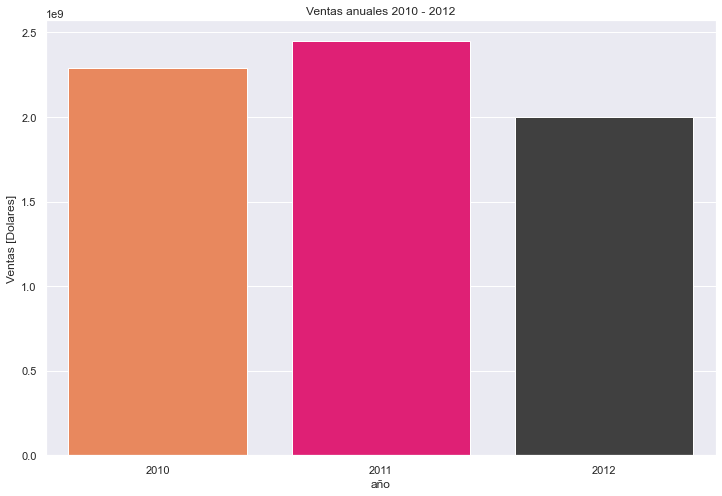

In [46]:
vta_anual = wall_data_2.groupby('año')[['vta_semana']].sum().reset_index()
# vta_anual
plt.figure(figsize=(12,8))
plt.title('Ventas anuales 2010 - 2012')
sns.barplot(x='año',y='vta_semana',data=vta_anual, palette =  ['#FF7F47','#FF0072','#404040'])
plt.xlabel('año')
plt.ylabel('Ventas [Dolares]')
plt.show()

## Análisis de los trimestres de 2012

#### Tercer trimestre

In [47]:
# vta_2012_2 # 
# periodo_tiempo(vta_2012_2,"2012-07-06","2012-09-28").groupby('tienda')['vta_semana'].sum()
# t2_2012 = vta_2012_2.groupby('trimestre').get_group('t2').groupby('tienda')[['vta_semana']].sum().reset_index()
# Con reset_index() las observaciones empiezan en cero y para graficar amabs gráficas necesitamos que empiece
# por el número de tienda
t2_2012 = vta_2012_2.groupby('trimestre').get_group('t2').groupby('tienda')[['vta_semana']].sum()
t3_2012 = vta_2012_2.groupby('trimestre').get_group('t3').groupby('tienda')[['vta_semana']].sum()

In [48]:
# Tiendas con diferencia negativa en sus vetas entre el trimestre 2 y 3:
# round(t3_2012.groupby('tienda').get_group(1).iloc[0,0]-t2_2012.groupby('tienda').get_group(1).iloc[0,0],2) #<- -724,812.34
# round(t3_2012.groupby('tienda').get_group(4).iloc[0,0]-t2_2012.groupby('tienda').get_group(4).iloc[0,0],2) #<- -657,571.21
# round(t3_2012.groupby('tienda').get_group(14).iloc[0,0]-t2_2012.groupby('tienda').get_group(14).iloc[0,0],2) #<- -3,967,974.76

# Tiendas con diferencia positiva en sus vetas entre el trimestre 2 y 3:
# round(t3_2012.groupby('tienda').get_group(7).iloc[0,0]-t2_2012.groupby('tienda').get_group(7).iloc[0,0],2) #<- 971,928.12
# round(t3_2012.groupby('tienda').get_group(26).iloc[0,0]-t2_2012.groupby('tienda').get_group(26).iloc[0,0],2) #<- 520,356.34
round(t3_2012.groupby('tienda').get_group(39).iloc[0,0]-t2_2012.groupby('tienda').get_group(39).iloc[0,0],2) #<- 500987.77

500987.77

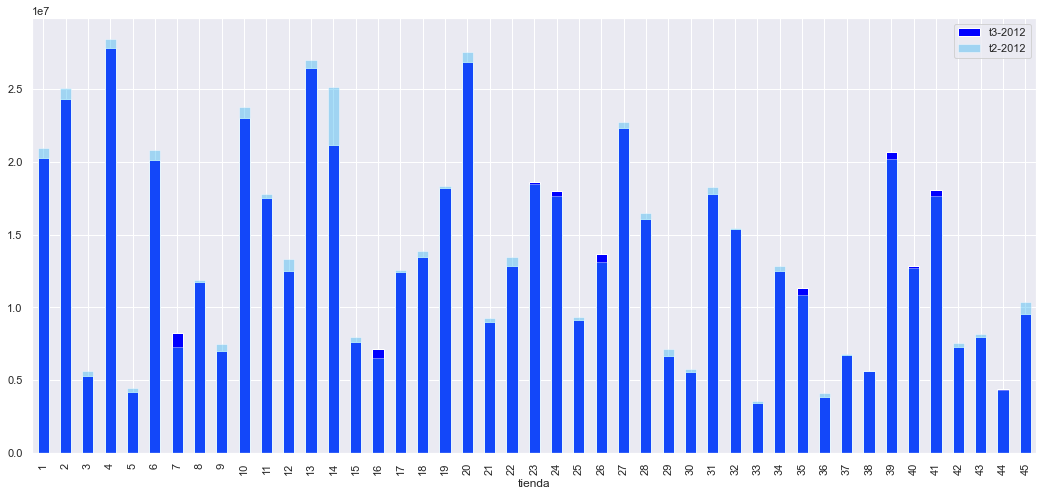

In [49]:
plt.rcParams["figure.figsize"] = (18,8)
# t2_2012.plot(ax = t3_2012.plot(kind='bar',legend=True), kind='bar',color='c',alpha=0.4, legend=True);
t2_2012.plot(ax = t3_2012.plot(kind='bar',color=['#0000FF'],legend=True), kind='bar',color=['#31B4F2'],alpha=0.4, legend=True);
plt.legend(['t3-2012','t2-2012']);
plt.show()

In [50]:
t2_2012_2 = vta_2012_2.groupby('trimestre').get_group('t2').groupby('tienda')[['vta_semana']].sum().reset_index()
t3_2012_2 = vta_2012_2.groupby('trimestre').get_group('t3').groupby('tienda')[['vta_semana']].sum().reset_index()
t2_2012_2.columns = ['tienda','vta_semana_t2']
t3_2012_2.columns = ['tienda','vta_semana_t3']

In [51]:
trimestres_2_3_2012 = pd.concat([t2_2012_2,t3_2012_2],axis=1)
trimestres_2_3_2012 = trimestres_2_3_2012.iloc[:,[0,1,3]]
trimestres_2_3_2012['diferencia'] = trimestres_2_3_2012['vta_semana_t3']-trimestres_2_3_2012['vta_semana_t2']
trimestres_2_3_2012['tasa_crecimiento'] = ((trimestres_2_3_2012['vta_semana_t3']-trimestres_2_3_2012['vta_semana_t2'])/trimestres_2_3_2012['vta_semana_t3'])*100
# trimestres_2_3_2012

In [52]:
trimestres_2_3_2012.sort_values(by ='diferencia', ascending= False).head(5)
# La tienda con un mayor crecimiento entre el trimestre 2 y 3 es la 7

tienda  vta_semana_t2  vta_semana_t3  diferencia  tasa_crecimiento
6        7   7,290,859.27   8,262,787.39  971,928.12             11.76
15      16   6,564,335.98   7,121,541.64  557,205.66              7.82
25      26  13,155,335.57  13,675,691.91  520,356.34              3.80
38      39  20,214,128.46  20,715,116.23  500,987.77              2.42
34      35  10,838,313.00  11,322,421.12  484,108.12              4.28

In [53]:
# trimestres_2_3_2012.sort_values(by ='vta_semana_t3', ascending= False)
# trimestres_2_3_2012.sort_values(by ='diferencia', ascending= False)[trimestres_2_3_2012['tienda']==4]
print(trimestres_2_3_2012.sort_values(by ='diferencia', ascending= False)[trimestres_2_3_2012['tienda']==4])
# La tienda con mayor crecimiento en el trimestre  3 es la 4 pero 
# tuvo una diferencia negativa en sus ganancias respecto al segundot trimestre.

   tienda  vta_semana_t2  vta_semana_t3  diferencia  tasa_crecimiento
3       4  28,454,363.67  27,796,792.46 -657,571.21             -2.37


In [54]:
trimestres_2_3_2012.sort_values(by ='vta_semana_t3', ascending= False).head(8)
print(trimestres_2_3_2012.sort_values(by ='vta_semana_t3', ascending= False)[trimestres_2_3_2012['tienda']==39])
# La tienda 39 tuvo mejores ventas en el tercer trimestre del 2012 y
# sus ganancias son positivas respecto al segundo trimestre

    tienda  vta_semana_t2  vta_semana_t3  diferencia  tasa_crecimiento
38      39  20,214,128.46  20,715,116.23  500,987.77              2.42


### Análisis de ventas por días feriados

In [55]:
# Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12      1-Trimestre
# Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12        3-Trimestre
# Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12    4-Trimestre
# Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12       4-Trimestre

In [56]:
# Se genera una variable con el contenido del dataset wall_data2 y se agrega la columna dia
wall_data_3 = wall_data_2
wall_data_3['dia'] =pd.DatetimeIndex(wall_data_3['fecha']).day
# Se crean variables con los valores del dataset correspondientes a los días festivos
# Días festivos
# wall_data_3[((wall_data_3['dia'] == 12 )|(wall_data_3['dia'] == 11 )|(wall_data_3['dia'] == 10)|(wall_data_3['dia'] == 8)) & (wall_data_3['mes']=='febrero')]
# wall_data_3[(wall_data_3['fecha']=='2010-02-12')|(wall_data_3['fecha']=='2011-02-11')|(wall_data_3['fecha']=='2012-02-10')]
# sb = ['2010-02-12','2011-02-11','2012-02-10']
# wall_data_3.loc[wall_data_3.fecha.isin(sb)]
spbowl = wall_data_3[(wall_data_3['fecha']=='2010-02-12')|(wall_data_3['fecha']=='2011-02-11')|(wall_data_3['fecha']=='2012-02-10')]
lab_day = wall_data_3[(wall_data_3['fecha']=='2010-09-10')|(wall_data_3['fecha']=='2011-09-09')|(wall_data_3['fecha']=='2012-09-07')]
tkg_day = wall_data_3[(wall_data_3['fecha']=='2010-11-26')|(wall_data_3['fecha']=='2011-11-25')|(wall_data_3['fecha']=='2012-11-23')]
chris_day = wall_data_3[(wall_data_3['fecha']=='2010-12-31')|(wall_data_3['fecha']=='2011-12-30')|(wall_data_3['fecha']=='2012-12-28')]

In [57]:
# Se genera una variable que contienen el grupo de días feriados y calcula su total y promedio
spbowl_tot_mean = spbowl.groupby('feriado')['vta_semana'].aggregate([sum,'mean']).reset_index()
spbowl_tot_mean.columns=['feriado','total','promedio']
lab_day_tot_mean = lab_day.groupby('feriado')['vta_semana'].aggregate([sum,'mean']).reset_index()
lab_day_tot_mean.columns=['feriado','total','promedio']
tkg_day_tot_mean = tkg_day.groupby('feriado')['vta_semana'].aggregate([sum,'mean']).reset_index()
tkg_day_tot_mean.columns=['feriado','total','promedio']
chris_day_tot_mean = chris_day.groupby('feriado')['vta_semana'].aggregate([sum,'mean']).reset_index()
chris_day_tot_mean.columns=['feriado','total','promedio']

In [58]:
# Se genera un dataframe con la suma y promedio del registro de ventas de los días festivos 
dias_feriados = pd.concat([spbowl_tot_mean,lab_day_tot_mean,tkg_day_tot_mean,chris_day_tot_mean], axis = 0, ignore_index=True)
dias_feriados['feriado']=['spbowl','lab_day','tkg_day','chris_day']
dias_feriados.sort_values(by = 'promedio', ascending = False)
# El día de acción de gracias tiene el mayor valor promedio de ventas registradas pero 
# el superball tiene el total de ventas más grande en el periodo febrero 2010 - octubre 2012 
# Tomar en cuenta que el día de acción de gracias y navidad no tiene registros para el 2012.

feriado          total     promedio
2    tkg_day 132,414,608.50 1,471,273.43
0     spbowl 145,682,278.34 1,079,127.99
1    lab_day 140,727,684.68 1,042,427.29
3  chris_day  86,474,980.04   960,833.11

In [59]:
# wall_data_3.groupby('feriado')[['vta_semana']].get_group(0).mean()
dias_no_feriados=wall_data_3[wall_data_3['feriado']==0].groupby('feriado')[['vta_semana']].mean().reset_index()
dias_no_feriados['feriado'] = 'no_feriado'
dias_no_feriados
# Los días feriados con ventas promedio que superan el promedio de ventas de dias no feriados
# son acción de gracias,superbowl, y día del trabajo. Seguramente navidad no lo supero porque
# hace falta el registro de noviembre y diciembre de 2012

feriado   vta_semana
0  no_feriado 1,041,256.38

#### Análisis de día feriado por año

In [60]:
# Se crean una variable que contenga las fechas de los días festivos
sb = ['2010-02-12','2011-02-11','2012-02-10']
lab = ['2010-09-10','2011-09-09','2012-09-07']
tkg = ['2010-11-26','2011-11-25','2012-11-23']
chris = ['2010-12-31','2011-12-30','2012-12-28']

# Se define una variable con el conjunto de datos de los días festivos
vta_anual_spbowl = wall_data_3.loc[wall_data_3.fecha.isin(sb)]
vta_anual_lab = wall_data_3.loc[wall_data_3.fecha.isin(lab)]
vta_anual_tkg = wall_data_3.loc[wall_data_3.fecha.isin(tkg)]
vta_anual_chris = wall_data_3.loc[wall_data_3.fecha.isin(chris)]

# Se sobreescribe el valor de las variables anteriores con el agrupamiento del total
# de vetntas por semana
vta_anual_spbowl = vta_anual_spbowl.groupby('año')[['vta_semana']].sum().reset_index()
vta_anual_lab = vta_anual_lab.groupby('año')[['vta_semana']].sum().reset_index()
vta_anual_tkg = vta_anual_tkg.groupby('año')[['vta_semana']].sum().reset_index()
vta_anual_chris = vta_anual_chris.groupby('año')[['vta_semana']].sum().reset_index()

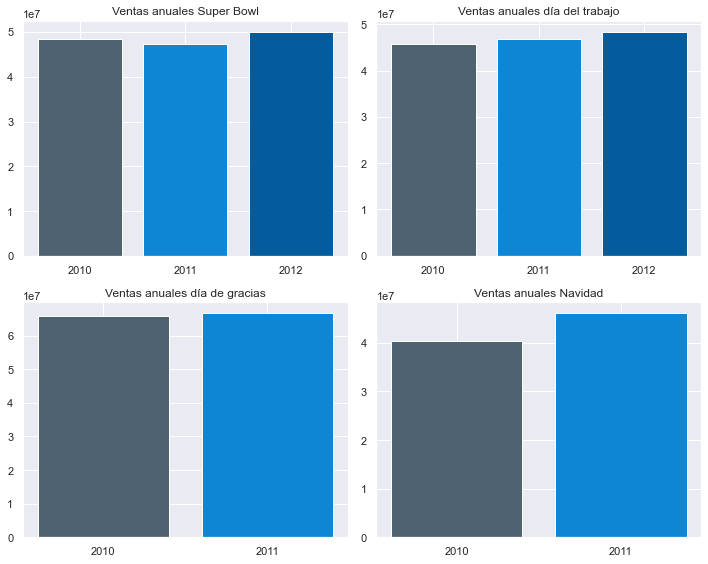

In [61]:
# plt.figure(figsize=(8,5))
# plt.title('Ventas anuales Super Bowl')
# sns.barplot(x='año',y='vta_semana',data=vta_anual_spbowl)
# plt.xlabel('año')
# plt.ylabel('Ventas [Dolares]')
# plt.show()

fig, ((ax,bx),(cx,dx))= plt.subplots(2,2,figsize=(10,8))
# colors = ['#4F6272', '#0E86D4', '#055C9D']
ax.bar(['2010','2011','2012'],vta_anual_spbowl.vta_semana,color = ['#4F6272', '#0E86D4', '#055C9D'])
ax.set_title('Ventas anuales Super Bowl')
bx.bar(['2010','2011','2012'],vta_anual_lab.vta_semana,color = ['#4F6272', '#0E86D4', '#055C9D'])
bx.set_title('Ventas anuales día del trabajo')
cx.bar(['2010','2011'],vta_anual_tkg.vta_semana,color = ['#4F6272', '#0E86D4'])
cx.set_title('Ventas anuales día de gracias')
dx.bar(['2010','2011'],vta_anual_chris.vta_semana,color = ['#4F6272', '#0E86D4'])
dx.set_title('Ventas anuales Navidad')
plt.tight_layout()
plt.show()

#### Venta Semanal y días Festivos

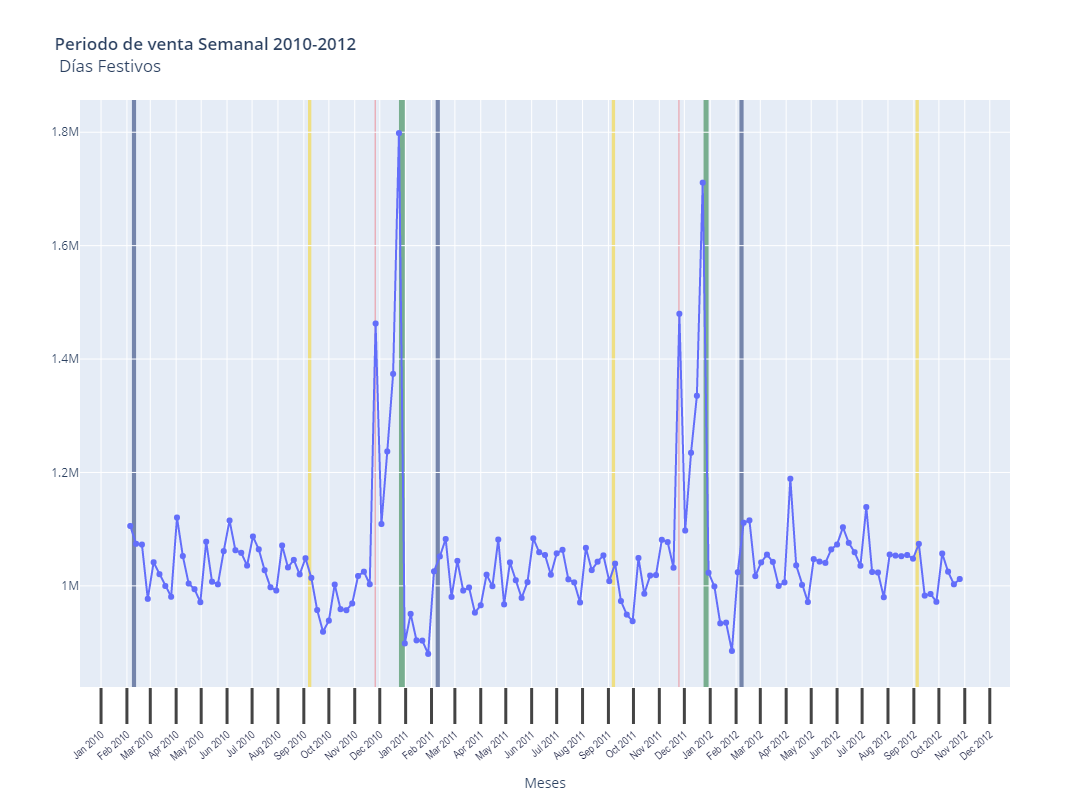

In [62]:
# Se crea un nuevo dataset al cual se le agrega la columna del numero de mes
wall_data_4 = wall_data_3
wall_data_4['num_mes']= pd.DatetimeIndex(wall_data_4['fecha']).month


# Se crea un nuevo dataset con el fin de determinar una serie de tiempo por semanas de los años 2010-2012
vta_time_serie_1 = wall_data_4.groupby(['año','mes','fecha'])[['vta_semana','num_mes','semana']].mean().sort_values(by=['año','num_mes']).reset_index()
x=vta_time_serie_1.fecha
y=vta_time_serie_1 .vta_semana
# text = vta_time_serie_1.semana

fig = go.Figure(layout=go.Layout(
    title='<b>Periodo de venta Semanal 2010-2012</b><br> Días Festivos</br>',
    width=1200,
    height=800
))
fig.add_trace(go.Scatter(
    x=x,
    y=y,
    mode='markers+lines+text',
    # text=text,
    # textposition='bottom center'
))

# SuperBowl (gris azulado)
fig.add_vrect(
    x0='2010-02-07',x1='2010-02-12',
    fillcolor='#041F60',opacity=0.5,
    layer='below',line_width=0
)
fig.add_vrect(
    x0='2011-02-06',x1='2011-02-11',
    fillcolor='#041F60',opacity=0.5,
    layer='below',line_width=0
)
fig.add_vrect(
    x0='2012-02-05',x1='2012-02-10',
    fillcolor='#041F60',opacity=0.5,
    layer='below',line_width=0
)

# Labor day (oro)
fig.add_vrect(
    x0='2010-09-06',x1='2010-09-10',
    fillcolor='#F8D210',opacity=0.5,
    layer='below',line_width=0
)
fig.add_vrect(
    x0='2011-09-05',x1='2011-09-09',
    fillcolor='#F8D210',opacity=0.5,
    layer='below',line_width=0
)
fig.add_vrect(
    x0='2012-09-03',x1='2012-09-07',
    fillcolor='#F8D210',opacity=0.5,
    layer='below',line_width=0
)

# thanksgiving (rojo)
fig.add_vrect(
    x0='2010-11-25',x1='2010-11-26',
    fillcolor='#F51720',opacity=0.5,
    layer='below',line_width=0
)
fig.add_vrect(
    x0='2011-11-24',x1='2011-11-25',
    fillcolor='#F51720',opacity=0.5,
    layer='below',line_width=0
)
# fig.add_vrect(
#     x0='2012-11-22',x1='2012-11-23',
#     fillcolor='#F51720',opacity=0.5,
#     layer='below',line_width=0
# )

# merry christmas ()
fig.add_vrect(
    x0='2010-12-24',x1='2010-12-31',
    fillcolor='#0A7029',opacity=0.5,
    layer='below',line_width=0
)
fig.add_vrect(
    x0='2011-12-24',x1='2011-12-30',
    fillcolor='#0A7029',opacity=0.5,
    layer='below',line_width=0
)
# fig.add_vrect(
#     x0='2012-12-24',x1='2012-12-28',
#     fillcolor='#0A7029',opacity=0.5,
#     layer='below',line_width=0
# )
fig.update_xaxes(title_text="Meses", ticks='outside',ticklen=36, tickwidth=3,nticks=45, tickangle=320,
                 tickfont=dict(family='Arial Narrow',size=11,color='#050A30'))

## Venta Mensual

In [63]:
# Se crea una tabla con la visualización de las ventas totales y promedio de los meses
# en el periodo 2010 al 2012.
vta_mensual_10_12 = wall_data_2.groupby('mes')['vta_semana'].aggregate([sum,'mean']).reset_index().sort_values(by='sum',ascending=False)
vta_mensual_10_12

mes            sum         mean
5        julio 650,000,977.25 1,031,747.58
0        abril 646,859,784.97 1,026,761.56
6        junio 622,629,886.84 1,064,324.59
1       agosto 613,090,208.82 1,048,017.45
7        marzo 592,785,901.28 1,013,309.23
10     octubre 584,784,787.59   999,632.12
11  septiembre 578,761,179.26   989,335.35
2    diciembre 576,838,635.20 1,281,863.63
4      febrero 568,727,890.45 1,053,199.80
8         mayo 557,125,571.95 1,031,714.02
9    noviembre 413,015,725.01 1,147,265.90
3        enero 332,598,438.49   923,884.55

In [64]:
# Se crea variables con la agrupación de meses del dataset (wall_data_4) para dividir ventas
# mensuales totales y promedio.
promedio_vta_mensual_10_12 = wall_data_4.groupby('mes')[['vta_semana','num_mes']].mean().sort_values(by='num_mes').reset_index()
total_vta_mensual_10_12 = wall_data_4.groupby(['num_mes','mes'])[['vta_semana']].sum().sort_values(by='num_mes').reset_index()
total_vta_mensual_10_12

num_mes         mes     vta_semana
0         1       enero 332,598,438.49
1         2     febrero 568,727,890.45
2         3       marzo 592,785,901.28
3         4       abril 646,859,784.97
4         5        mayo 557,125,571.95
5         6       junio 622,629,886.84
6         7       julio 650,000,977.25
7         8      agosto 613,090,208.82
8         9  septiembre 578,761,179.26
9        10     octubre 584,784,787.59
10       11   noviembre 413,015,725.01
11       12   diciembre 576,838,635.20

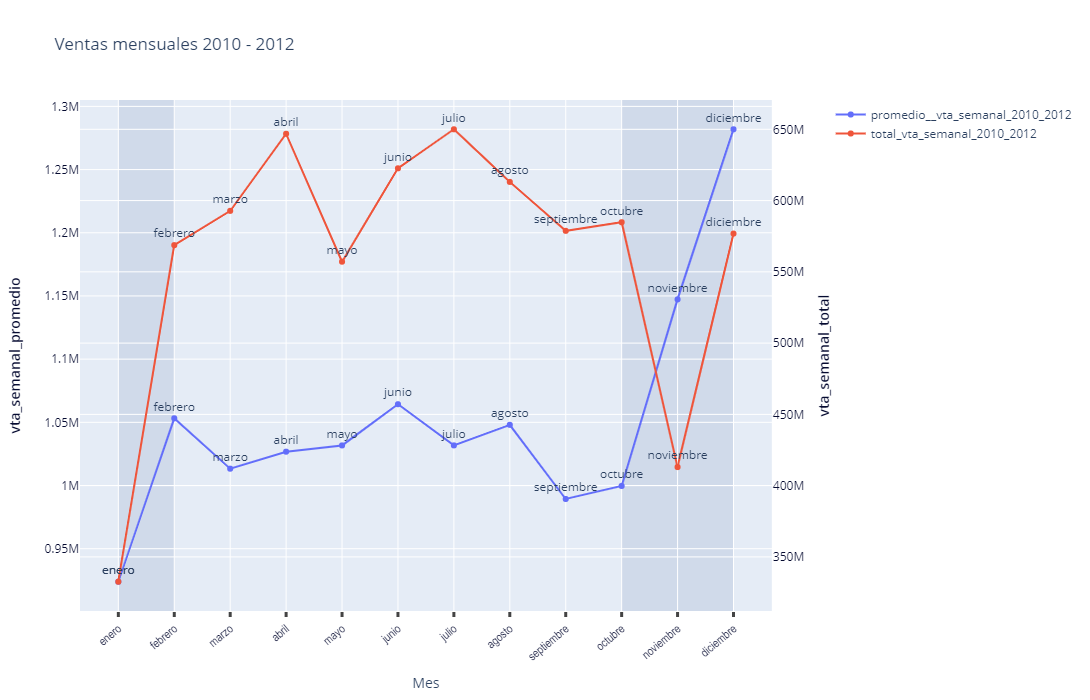

In [65]:
# Se gráfica la venta mensual total y promedio de los años 2010 - 2012
x_mes_total = total_vta_mensual_10_12.mes
y_mes_total = total_vta_mensual_10_12.vta_semana
x_mes_prom = promedio_vta_mensual_10_12.mes
y_mes_prom = promedio_vta_mensual_10_12.vta_semana

fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Scatter(x = x_mes_prom ,y = y_mes_prom , name="promedio__vta_semanal_2010_2012",mode='markers+lines+text',
    text=promedio_vta_mensual_10_12.mes,textposition='top center'),
    secondary_y=False
)

fig.add_trace(
    go.Scatter(x = x_mes_total ,y = y_mes_total, name="total_vta_semanal_2010_2012",mode='markers+lines+text',
    text=total_vta_mensual_10_12.mes,textposition='top center'),
    secondary_y=True
)
fig.add_vrect(
    x0='enero',x1='febrero',
    fillcolor='#BBC8DE',opacity=0.5,
    layer='below', line_width=0,
)

fig.add_vrect(
    x0='octubre',x1='diciembre',
    fillcolor='#BBC8DE',opacity=0.5,
    layer='below', line_width=0,
)

fig.update_layout(
    title_text="Ventas mensuales 2010 - 2012",
    width = 1200, height = 700
)

fig.update_xaxes(title_text="Mes", ticks='outside',ticklen=5, tickwidth=3,nticks=45, tickangle=320,
                 tickfont=dict(family='Arial Narrow',size=12,color='#050A30'))

fig.update_yaxes(title_text="<b>vta_semanal_promedio</b>", secondary_y=False,color='#050A30')
fig.update_yaxes(title_text="<b>vta_semanal_total</b>", secondary_y=True,color='#050A30')

fig.show()


In [66]:
# Se separa el año y mes e una ueva columna del dataset wall_data_4 
# para poder analizar por meses la venta de todas las tiendas de los
# años 2010-2012. Al separar por promedio, fue necesario pasarlo a string.
# wall_data_4['año_mes'] = wall_data_4['fecha'].dt.to_period('M')
# wall_data_4['fecha'].dt.to_period('M').dt.strftime("%Y-%m")
wall_data_4['año_mes'] = wall_data_4['fecha'].dt.to_period('M').dt.strftime("%Y-%m")

# Se agrupa por año,mes y año_mes el datasetr wall_data_4 y se obtiene el promedio de vta
# mensual
# wall_data_4.groupby(['año','mes',])[['vta_semana','num_mes']].mean().sort_values(by=['año','num_mes']).reset_index()
# wall_data_4.groupby(['año','mes','año_mes'])[['vta_semana','num_mes']].mean().sort_values(by=['año','num_mes']).reset_index()
vta_time_serie_2 = wall_data_4.groupby(['año','mes','año_mes'])[['vta_semana','num_mes']].mean().sort_values(by=['año','num_mes']).reset_index()

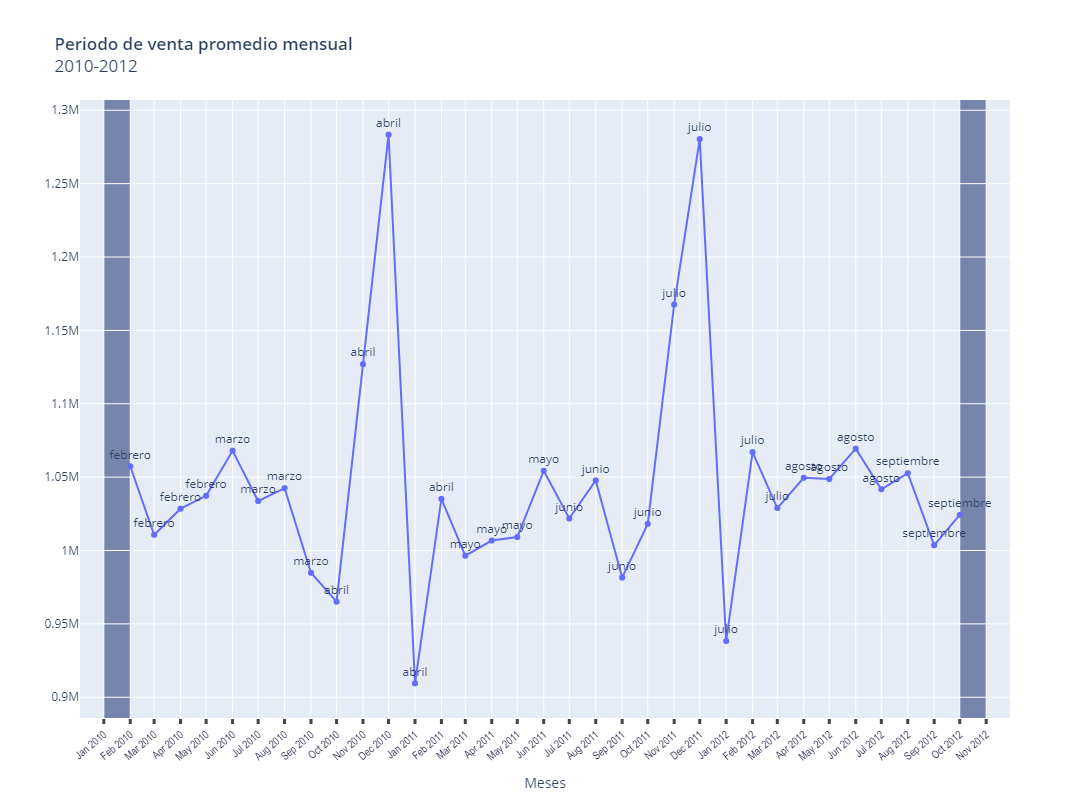

In [67]:
x_mes_prom = vta_time_serie_2.año_mes
y_mes_prom = vta_time_serie_2.vta_semana

fig = go.Figure(layout=go.Layout(
        title="<b>Periodo de venta promedio mensual</b><br>2010-2012</br>",
        width=1200,
        height=800,
    ))

fig.add_trace(go.Scatter(
    x = x_mes_prom,
    y = y_mes_prom,
    mode='markers+lines+text',
    text=vta_time_serie_1.mes,
    textposition='top center'
))

fig.add_vrect(
    x0='2010-01', x1='2010-02',
    fillcolor='#041F60',opacity=0.5,
    layer='below', line_width=0,
),
fig.add_vrect(
    x0='2012-10', x1='2012-11',
    fillcolor='#041F60',opacity=0.5,
    layer='below', line_width=0,
),

fig.update_xaxes(title_text="Meses", ticks='outside',ticklen=5, tickwidth=3,nticks=45, tickangle=320,
                 tickfont=dict(family='Arial Narrow',size=11,color='#050A30'))
fig.show()